# Lead scoring assignment
## Submitted by:
        Sonali
        Nitish Singh
        Prasanth kumar reddy Mura
        (Batch DS C47)


# Problem statement:
    An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
    The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
    Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

# Goal:
    Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
    
    

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 200)

# 1. Importing the data

In [3]:
# importing the dataset

df_lead = pd.read_csv('lead_scoring.csv')
df_lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# 2. Inspecting the data

In [4]:
df_lead.shape

(9240, 37)

In [5]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df_lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Converting 'Select' values to NaN.
df_lead = df_lead.replace('Select', np.nan)

In [8]:
# finding the missing values in the columns

missing_values_col_per = round(df_lead.isnull().mean()*100,2)

In [9]:
missing_values_col_per

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
missing_values_col = missing_values_col_per[missing_values_col_per>=40]

In [11]:
len(missing_values_col)

7

# Dropping columns having missing values percentage greater then 40

In [12]:
df_lead.drop(missing_values_col.index, axis = 1, inplace = True)

In [13]:
## checking whether columns are removed or not

df_lead.shape

(9240, 30)

In [14]:
round(df_lead.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### specialisation has 36.58 null values . this may be due to som epeople have not opted for specilaisation . 

In [15]:
# Creating a separate category called 'Others' for this 

df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan, 'Others')

In [16]:
df_lead['Specialization'].isnull().sum()

0

In [17]:
# Replacing null values in tags columns with Not Specified

df_lead['Tags'] = df_lead['Tags'].replace(np.nan,'Not Specified')

In [18]:
df_lead['Tags'].isnull().sum()

0

In [19]:
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
# Dropping this column as this is very much skewed

df_lead = df_lead.drop('What matters most to you in choosing a course',axis=1)

In [21]:
# replacing nan values with not specified

df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan,'Not Specified')

In [22]:
# Replacing missing value with its not provided

df_lead['Country']=df_lead['Country'].replace(np.nan,"Not Provided")


In [23]:
df_lead['City'].mode()[0]

'Mumbai'

In [24]:
# Replacing missing value with its mode

df_lead['City'].fillna(df_lead['City'].mode()[0], inplace = True)

In [25]:
round(df_lead.isnull().mean()*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [26]:
df_lead.shape

(9240, 29)

# 3. EDA - Exaploratory Data Analysis

## * Checking for duplicates

In [27]:
df_lead[df_lead.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, What is your current occupation, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

In [28]:
#dropping 'Lead Number' and 'Prospect ID' since they have all unique values

df_lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

### So, no duplicates records are present in the dataset.

## * Univariate Analysis

### * Lead Source

In [29]:
def univariate_analysis(col):

    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = "Converted", data = df_lead)
    plt.title("Conversion in terms of Lead Source")
    plt.xticks(rotation = 90)
    plt.show()

### * Lead Source

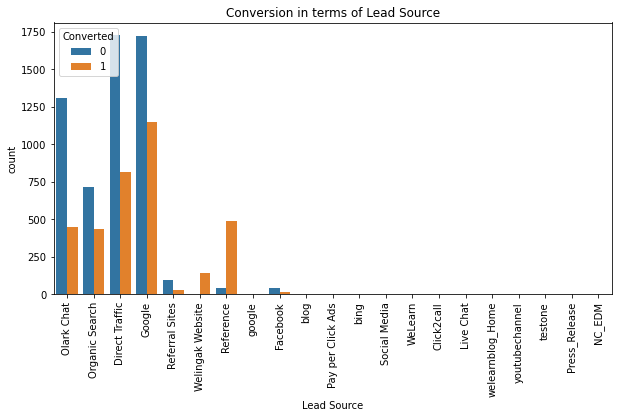

In [30]:
univariate_analysis(df_lead['Lead Source'])

In [31]:
# There are two- google and Google. So they can be merge

df_lead['Lead Source'] = df_lead['Lead Source'].replace(['google'], 'Google')


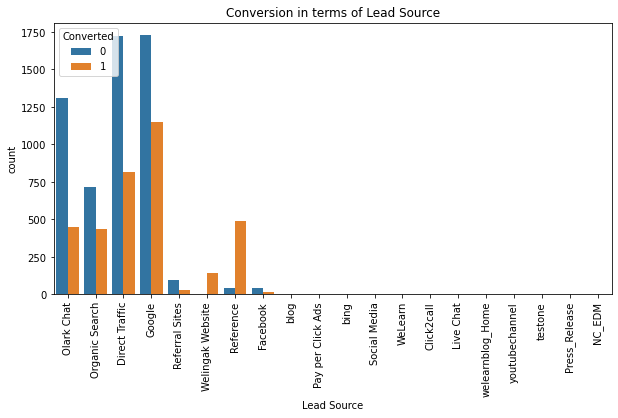

In [32]:
univariate_analysis(df_lead['Lead Source'])

### * Lead origin

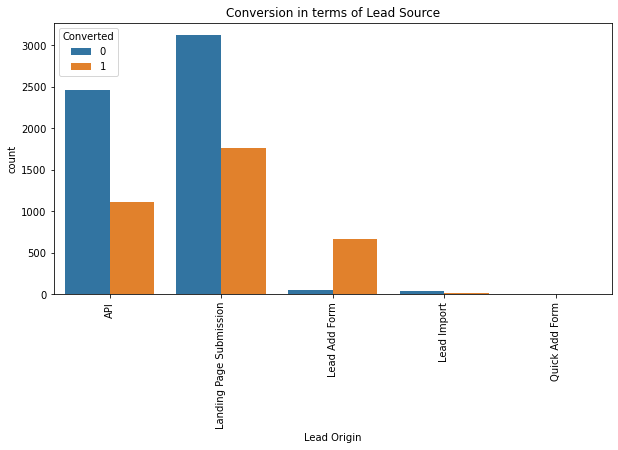

In [33]:
univariate_analysis(df_lead['Lead Origin'])

#### Lead Add Form has the highest conversion rate

### * Do Not Email 

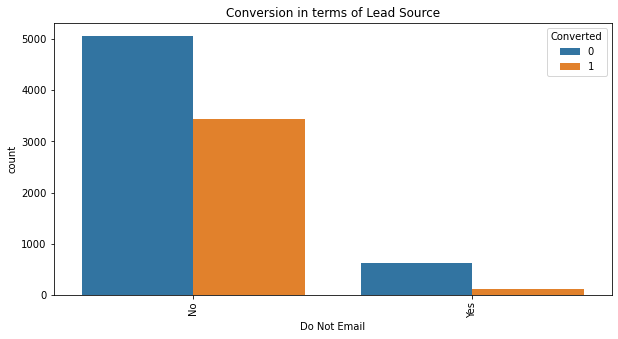

In [34]:
univariate_analysis(df_lead['Do Not Email'])

### * Do Not call

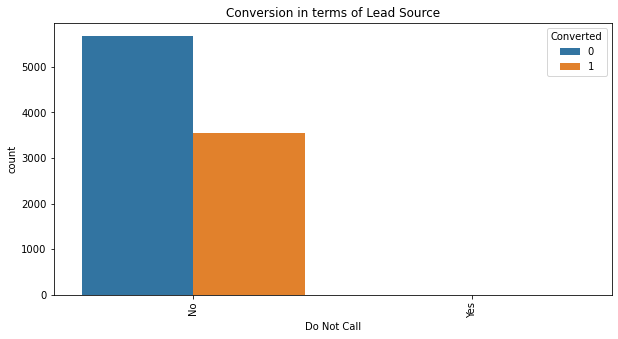

In [35]:
univariate_analysis(df_lead['Do Not Call'])

#### Mostly people are not likely to be call or receive email regarding the course

### * Total visits

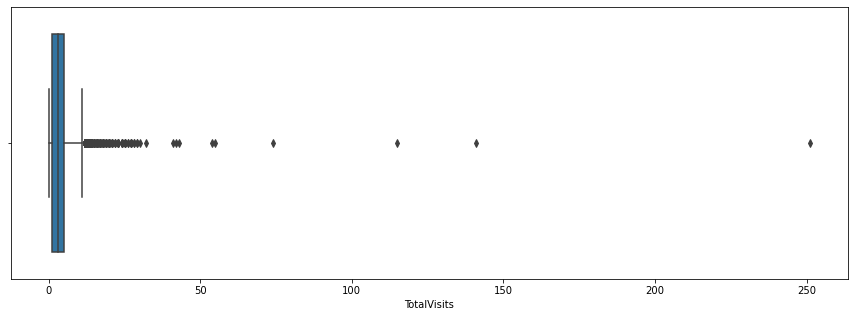

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(df_lead['TotalVisits'])
plt.show()

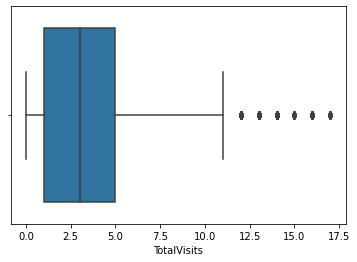

In [37]:
Q3 = df_lead['TotalVisits'].quantile(0.99)
df_lead = df_lead[(df_lead.TotalVisits <= Q3)]
Q1 = df_lead.TotalVisits.quantile(0.01)
df_lead = df_lead[(df_lead.TotalVisits >= Q1)]
sns.boxplot(df_lead['TotalVisits'])
plt.show()

#### *Total Time Spent on Website

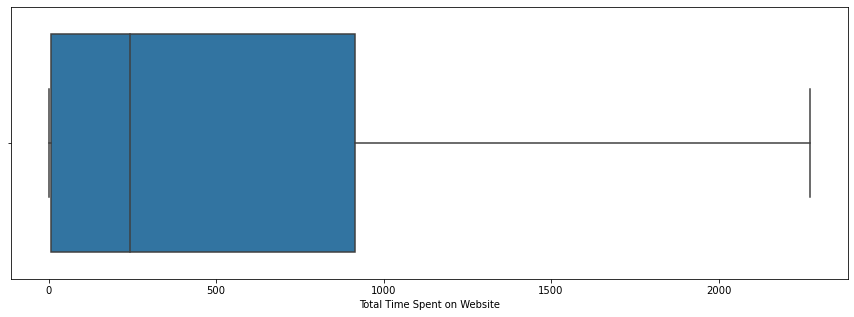

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(df_lead['Total Time Spent on Website'])
plt.show()

#### * Page Views Per Visit  

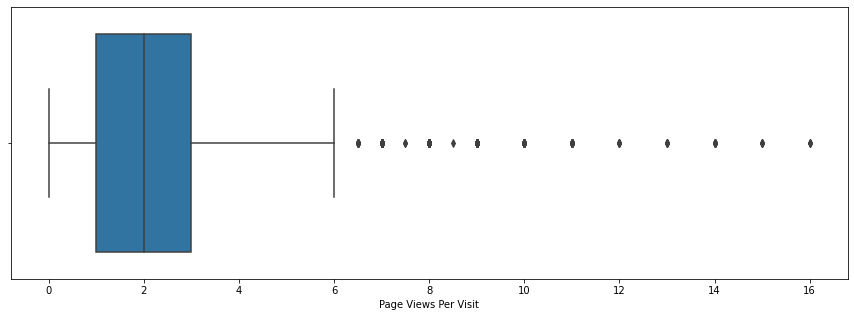

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(df_lead['Page Views Per Visit'])
plt.show()

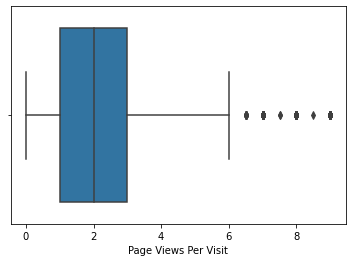

In [40]:
Q3 = df_lead['Page Views Per Visit'].quantile(0.99)
df_lead = df_lead[(df_lead['Page Views Per Visit'] <= Q3)]
Q1 = df_lead['Page Views Per Visit'].quantile(0.01)
df_lead = df_lead[(df_lead['Page Views Per Visit'] >= Q1)]
sns.boxplot(df_lead['Page Views Per Visit'])
plt.show()

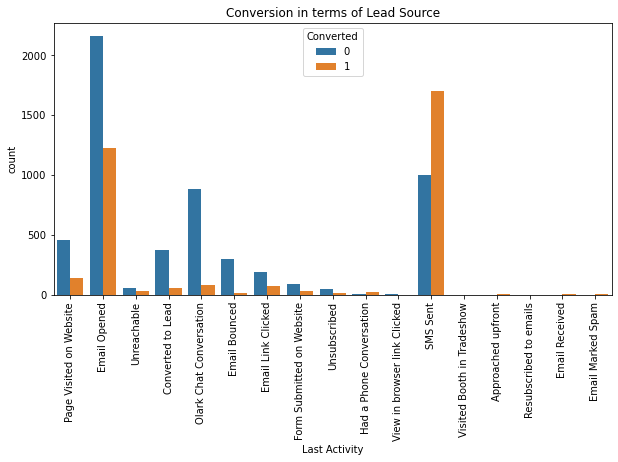

In [41]:
univariate_analysis(df_lead['Last Activity'])

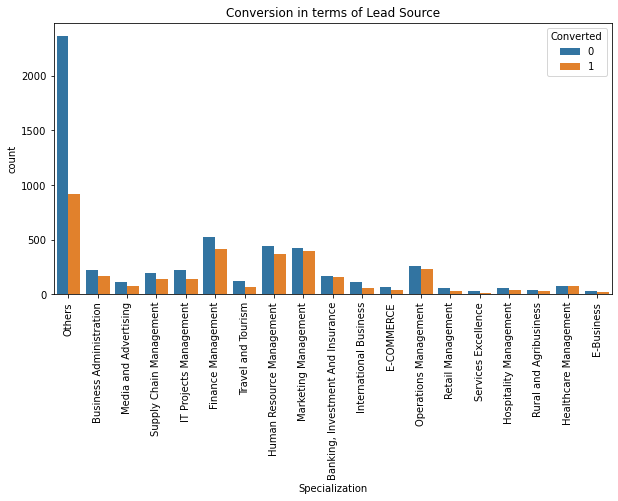

In [42]:
univariate_analysis(df_lead['Specialization'])

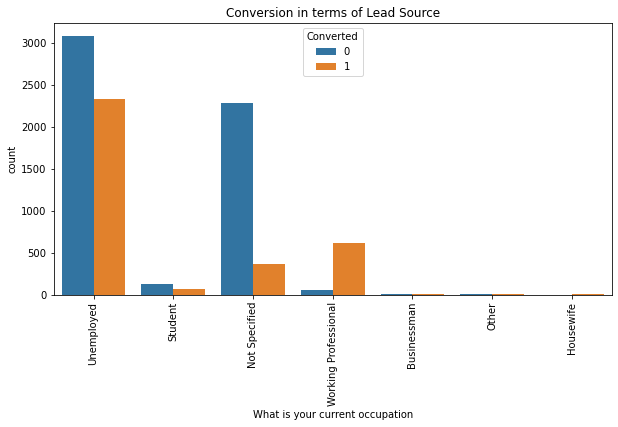

In [43]:
univariate_analysis(df_lead['What is your current occupation'])

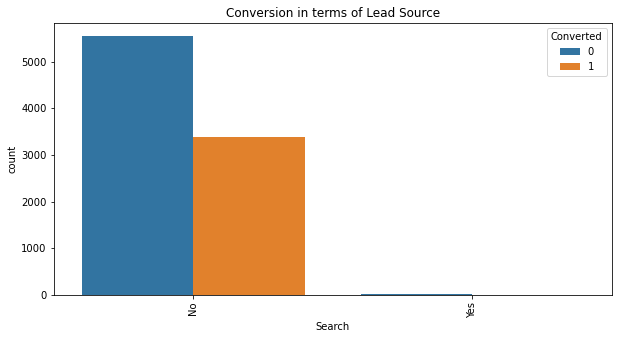

In [44]:
univariate_analysis(df_lead['Search'])

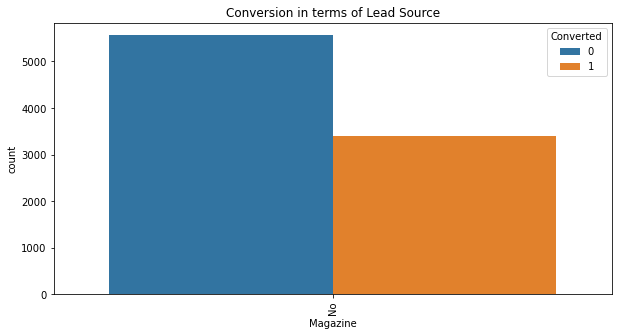

In [45]:
univariate_analysis(df_lead['Magazine'])

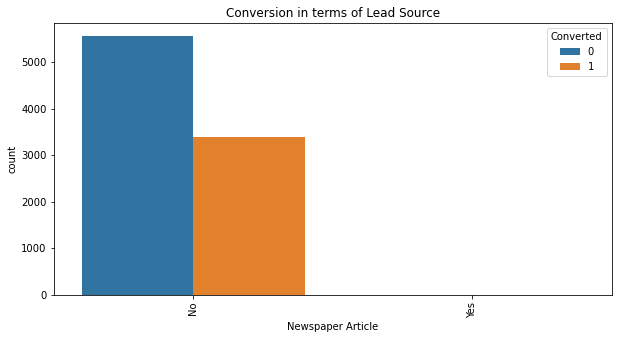

In [46]:
univariate_analysis(df_lead['Newspaper Article'])

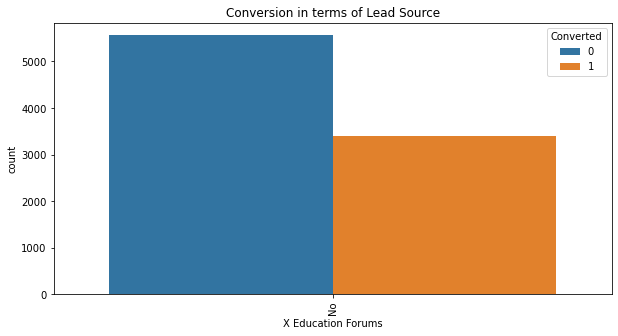

In [47]:
univariate_analysis(df_lead['X Education Forums'])

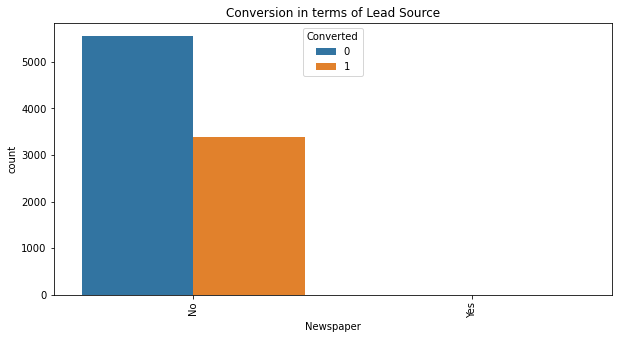

In [48]:
univariate_analysis(df_lead['Newspaper'])

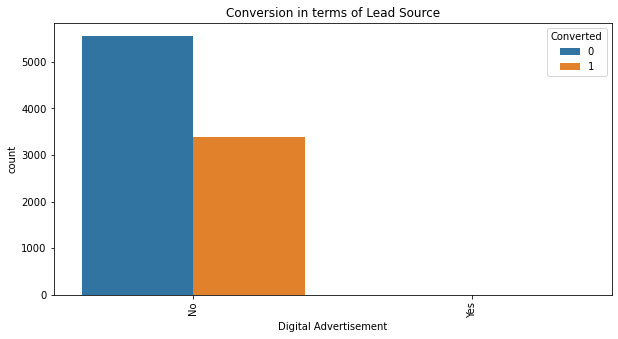

In [49]:
univariate_analysis(df_lead['Digital Advertisement'])

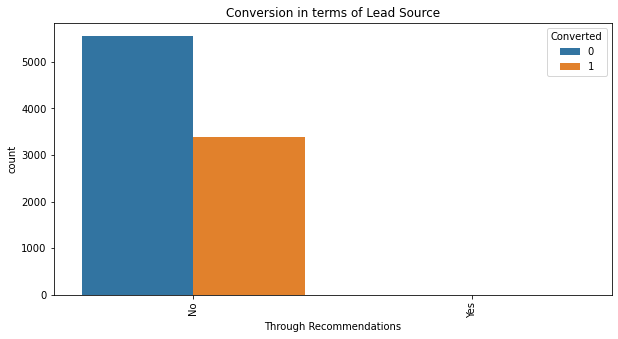

In [50]:
univariate_analysis(df_lead['Through Recommendations'])

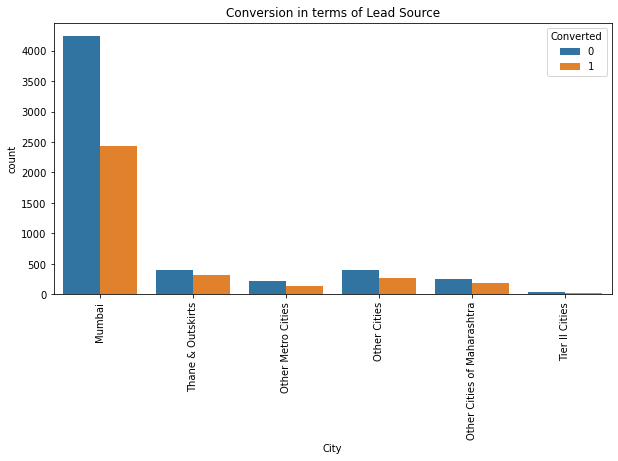

In [51]:
univariate_analysis(df_lead['City'])

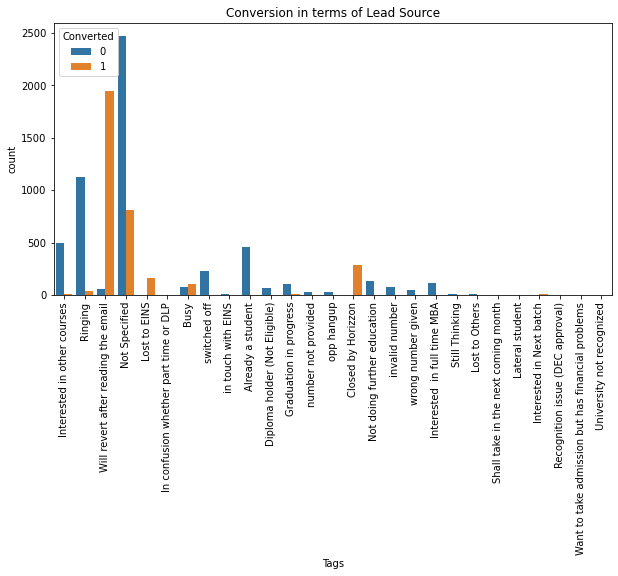

In [52]:
univariate_analysis(df_lead['Tags'])

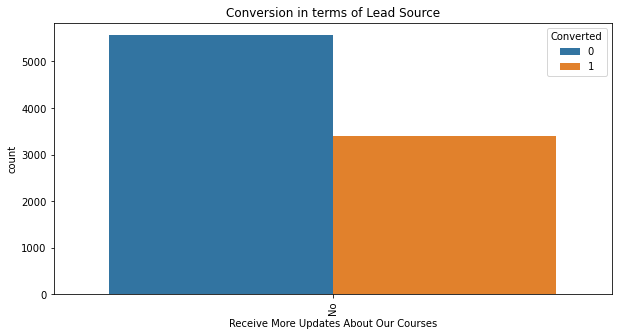

In [53]:
univariate_analysis(df_lead['Receive More Updates About Our Courses'])

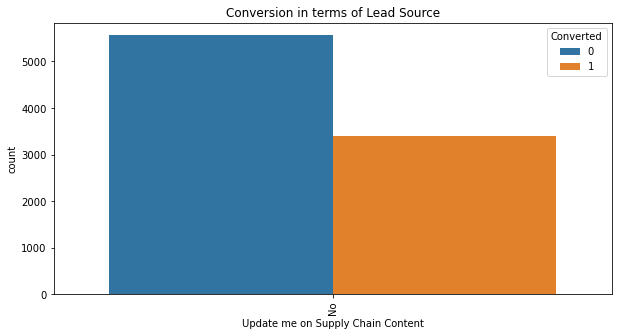

In [54]:
univariate_analysis(df_lead['Update me on Supply Chain Content'])

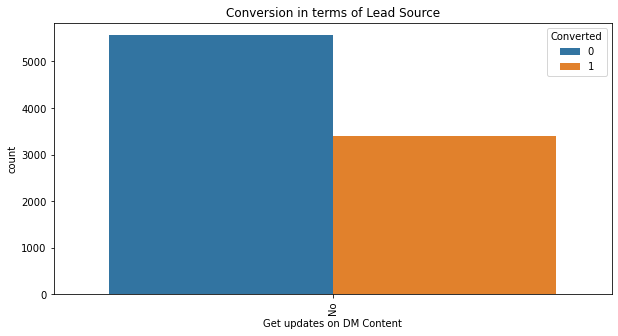

In [55]:
univariate_analysis(df_lead['Get updates on DM Content'])

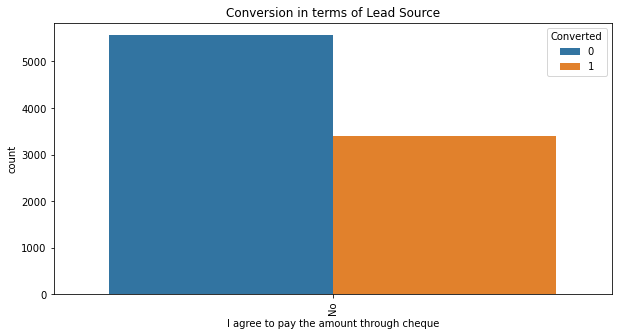

In [56]:
univariate_analysis(df_lead['I agree to pay the amount through cheque'])

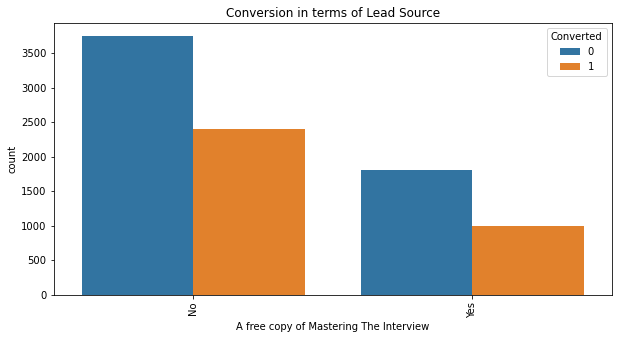

In [57]:
univariate_analysis(df_lead['A free copy of Mastering The Interview'])

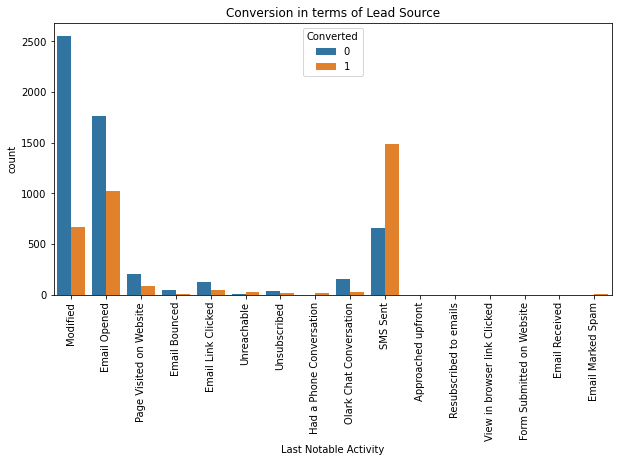

In [58]:
univariate_analysis(df_lead['Last Notable Activity'])

In [59]:
cols_to_drop = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 'Do Not Call',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content',
                 'I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Country'])

In [60]:
df_lead = df_lead.drop(cols_to_drop, axis = 1)

In [61]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8953 non-null   object 
 1   Lead Source                      8924 non-null   object 
 2   Do Not Email                     8953 non-null   object 
 3   Converted                        8953 non-null   int64  
 4   TotalVisits                      8953 non-null   float64
 5   Total Time Spent on Website      8953 non-null   int64  
 6   Page Views Per Visit             8953 non-null   float64
 7   Last Activity                    8953 non-null   object 
 8   Specialization                   8953 non-null   object 
 9   What is your current occupation  8953 non-null   object 
 10  Tags                             8953 non-null   object 
 11  City                             8953 non-null   object 
 12  Last Notable Activit

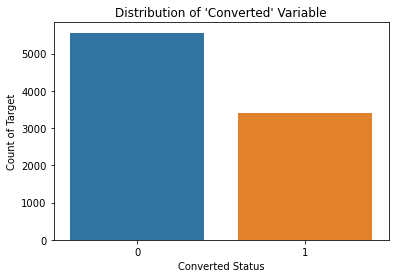

In [62]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable

sns.countplot(df_lead.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [63]:
# Finding converted rate

Converted_rate = round((sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100,2)
Converted_rate

37.92

### So, currently  conversion rate is 37.92%

## * Correlation

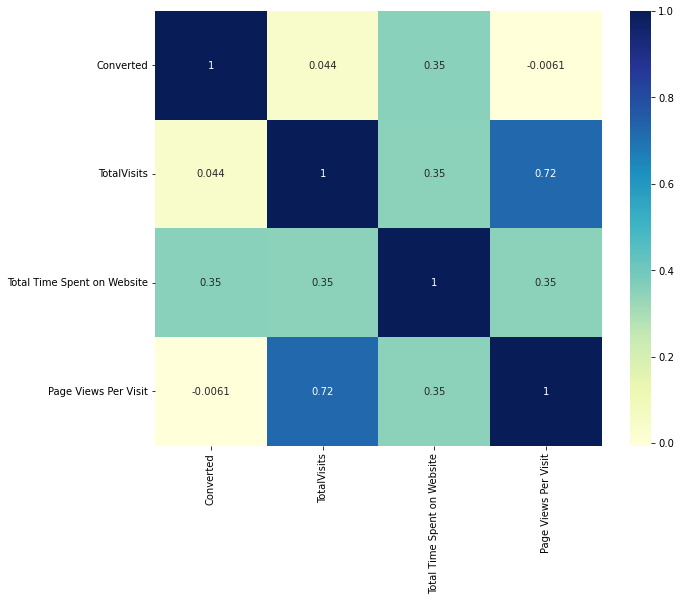

In [64]:
#Checking correlations of numeric values using heatmap


plt.figure(figsize=(10,8))
sns.heatmap(df_lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

### So 'Total Time Spent On Websites' and 'Page views Per Visit' have high correlation

## * Bivariate Analysis

In [65]:
def bivariate_analysis(col):
    plt.figure(figsize=(15,5))
    sns.boxplot(y = col , x = 'Converted', data = df_lead)
    plt.show()

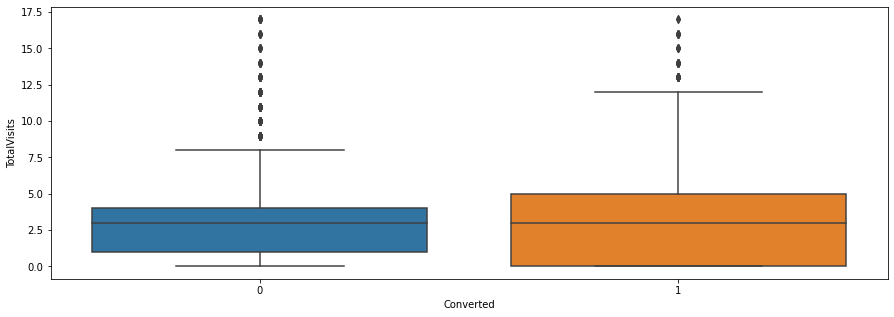

In [66]:
bivariate_analysis(df_lead['TotalVisits'])

#### median of both is almost same. So nothing can be specified.

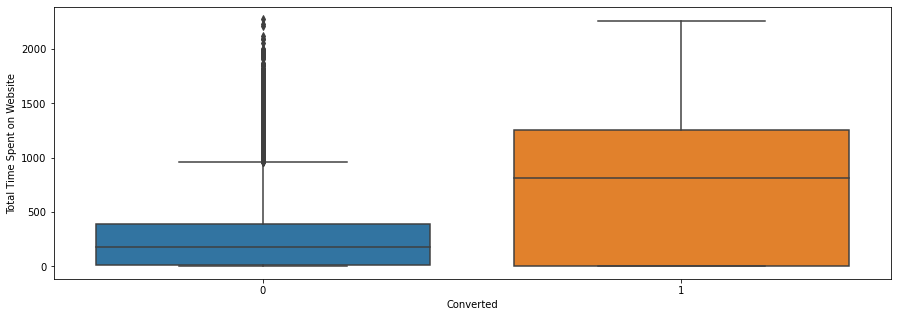

In [67]:
bivariate_analysis(df_lead['Total Time Spent on Website'])

### Website should be made more engaging to make leads.

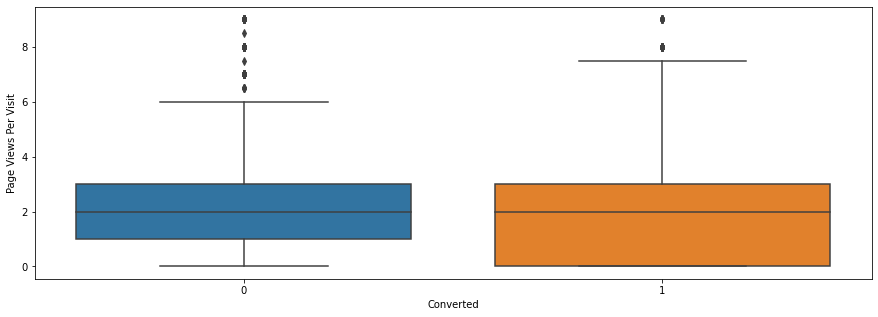

In [68]:
bivariate_analysis(df_lead['Page Views Per Visit'])

### Median are almost same so nothing could be said.

In [69]:
df_lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City Last Notable Activity  
0  Mumbai              Modified  
1  Mumbai          Email Opened  
2  Mumbai          Email Opened  
3  Mumbai              Modified  
4  Mumbai              Modified

# 4. Data Preparation

## * Converting some binary varibles to 1/0

In [70]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead[varlist] = df_lead[varlist].apply(binary_map)

In [71]:
df_lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City Last Notable Activity  
0  Mumbai              Modified  
1  Mumbai          Email Opened  
2  Mumbai          Email Opened  
3  Mumbai              Modified  
4  Mumbai              Modified

## * Creating Dummy variables

In [72]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      8953 non-null   object 
 1   Lead Source                      8924 non-null   object 
 2   Do Not Email                     8953 non-null   int64  
 3   Converted                        8953 non-null   int64  
 4   TotalVisits                      8953 non-null   float64
 5   Total Time Spent on Website      8953 non-null   int64  
 6   Page Views Per Visit             8953 non-null   float64
 7   Last Activity                    8953 non-null   object 
 8   Specialization                   8953 non-null   object 
 9   What is your current occupation  8953 non-null   object 
 10  Tags                             8953 non-null   object 
 11  City                             8953 non-null   object 
 12  Last Notable Activit

In [73]:
# Creating dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_lead[['Lead Origin','Specialization' ,'Lead Source','What is your current occupation', 
                                'Last Activity', 'Tags', 'City', 'Last Notable Activity']], drop_first=True)

# Adding the results to the dataframe
df_lead = pd.concat([df_lead, dummy], axis=1)
df_lead

Lead Origin     Lead Source  Do Not Email  Converted  \
0                         API      Olark Chat             0          0   
1                         API  Organic Search             0          0   
2     Landing Page Submission  Direct Traffic             0          1   
3     Landing Page Submission  Direct Traffic             0          0   
4     Landing Page Submission          Google             0          1   
...                       ...             ...           ...        ...   
9235  Landing Page Submission  Direct Traffic             1          1   
9236  Landing Page Submission  Direct Traffic             0          0   
9237  Landing Page Submission  Direct Traffic             1          0   
9238  Landing Page Submission          Google             0          1   
9239  Landing Page Submission  Direct Traffic             0          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0             0.0                            0                  0.00   
1             5.0                          674                  2.50   
2             2.0                         1532                  2.00   
3             1.0                          305                  1.00   
4             2.0                         1428                  1.00   
...           ...                          ...                   ...   
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

                Last Activity             Specialization  \
0     Page Visited on Website                     Others   
1                Email Opened                     Others   
2                Email Opened    Business Administration   
3                 Unreachable      Media and Advertising   
4           Converted to Lead                     Others   
...                       ...                        ...   
9235        Email Marked Spam     IT Projects Management   
9236                 SMS Sent      Media and Advertising   
9237                 SMS Sent    Business Administration   
9238                 SMS Sent  Human Resource Management   
9239                 SMS Sent    Supply Chain Management   

     What is your current occupation                                 Tags  \
0                         Unemployed          Interested in other courses   
1                         Unemployed                              Ringing   
2                            Student  Will revert after reading the email   
3                         Unemployed                              Ringing   
4                         Unemployed  Will revert after reading the email   
...                              ...                                  ...   
9235                      Unemployed  Will revert after reading the email   
9236                      Unemployed                   wrong number given   
9237                      Unemployed                       invalid number   
9238                   Not Specified                        Not Specified   
9239                      Unemployed  Will revert after reading the email   

                    City Last Notable Activity  \
0                 Mumbai              Modified   
1                 Mumbai          Email Opened   
2                 Mumbai          Email Opened   
3                 Mumbai              Modified   
4                 Mumbai              Modified   
...                  ...                   ...   
9235              Mumbai     Email Marked Spam   
9236              Mumbai              SMS Sent   
9237              Mumbai              SMS Sent   
9238  Other Metro Cities              SMS Sent   
9239        Other Cities              Modified   

      Lead Origin

In [74]:
df_lead = df_lead.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                'Specialization', 'What is your current occupation', 'Tags', 'City',
                'Last Notable Activity'], axis = 1)
df_lead

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0                0          0          0.0                            0   
1                0          0          5.0                          674   
2                0          1          2.0                         1532   
3                0          0          1.0                          305   
4                0          1          2.0                         1428   
...            ...        ...          ...                          ...   
9235             1          1          8.0                         1845   
9236             0          0          2.0                          238   
9237             1          0          2.0                          199   
9238             0          1          3.0                          499   
9239             0          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Specialization_Business Administration  Specialization_E-Business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9235                                       0                          0   
9236                                       0                          0   
9237                                       1                          0   
9238                                       0                          0   
9239                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
9235                          0                                  0   
9236                          0                                  0   
9237                          0                 

# 5. Train - Test Split

In [75]:
# Putting variable to X and y 
X= df_lead.drop('Converted', axis=1)

y = df_lead['Converted']

#checking head of X and y

print(X.head())
print(y.head())

   Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                   

In [76]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Columns: 112 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(2), uint8(108)
memory usage: 905.8 KB


# 6. Feature scaling

In [78]:
#scaling of features

scaler = StandardScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
9196             0     0.668862                     1.848117   
4696             0    -0.030697                    -0.037832   
3274             0     0.319082                    -0.642138   
2164             0    -0.380477                    -0.154676   
1667             0     0.319082                     1.258415   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
9196              1.455819                                    1   
4696              0.399961                                    1   
3274             -0.127967                                    1   
2164             -0.127967                                    0   
1667             -0.481679                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
9196                          0                        0   
4696                          0                        0   
3274                          0                        0   
2164                          0                        0   
1667                          0                        0   

      Specialization_Business Administration  Specialization_E-Business  \
9196                                       0                          0   
4696                                       0                          0   
3274                                       0                          0   
2164                                       0                          0   
1667                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
9196                          0                                  1   
4696                          0                                  0   
3274                          0                                  0   
2164                          0                                  0   
1667                          0                                  0   

      Specialization_Healthcare Management  \
9196                                     0   
4696                                     0   
3274                                     1   
2164                                     0   
1667                                     0   

      Specialization_Hospitality Management  \
9196                                      0   
4696                                      0   
3274                                      0   
2164                                      0   
1667                                      0   

      Specialization_Human Resource Management  \
9196                                         0   
4696                                         0   
3274                                         0   
2164                                         0   
1667                                         0   

      Specialization_IT Projects Management  \
9196                                      0   
4696                                      0   
3274                                      0   
2164                                      0   
1667                                      0   

      Specialization_International Business  \
9196                                      0   
4696                                      0   
3274                                      0   
2164                                      0   
1667                                      0   

      Specialization_Marketing Management  \
9196                                    0   
4696                                    0   
3274                                    0   
2164                                    0   
1667                                    0   

      Specialization_Media and Advertising  \
9196                                     0   
4696                                     1   
3274                                     0   
2164                                     0   
1667                                     0   

      Spec

In [79]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].describe()

TotalVisits  Page Views Per Visit  Total Time Spent on Website
count  6.267000e+03          6.267000e+03                 6.267000e+03
mean   1.989083e-16          1.346369e-17                -1.465062e-16
std    1.000080e+00          1.000080e+00                 1.000080e+00
min   -1.080035e+00         -1.183825e+00                -8.721766e-01
25%   -7.302559e-01         -6.558959e-01                -8.703509e-01
50%   -3.069709e-02         -1.279673e-01                -4.449628e-01
75%    3.190823e-01          3.999613e-01                 8.001647e-01
max    4.866215e+00          3.567533e+00                 3.275814e+00

In [80]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

37.92025019546521

### Looking at Correlations

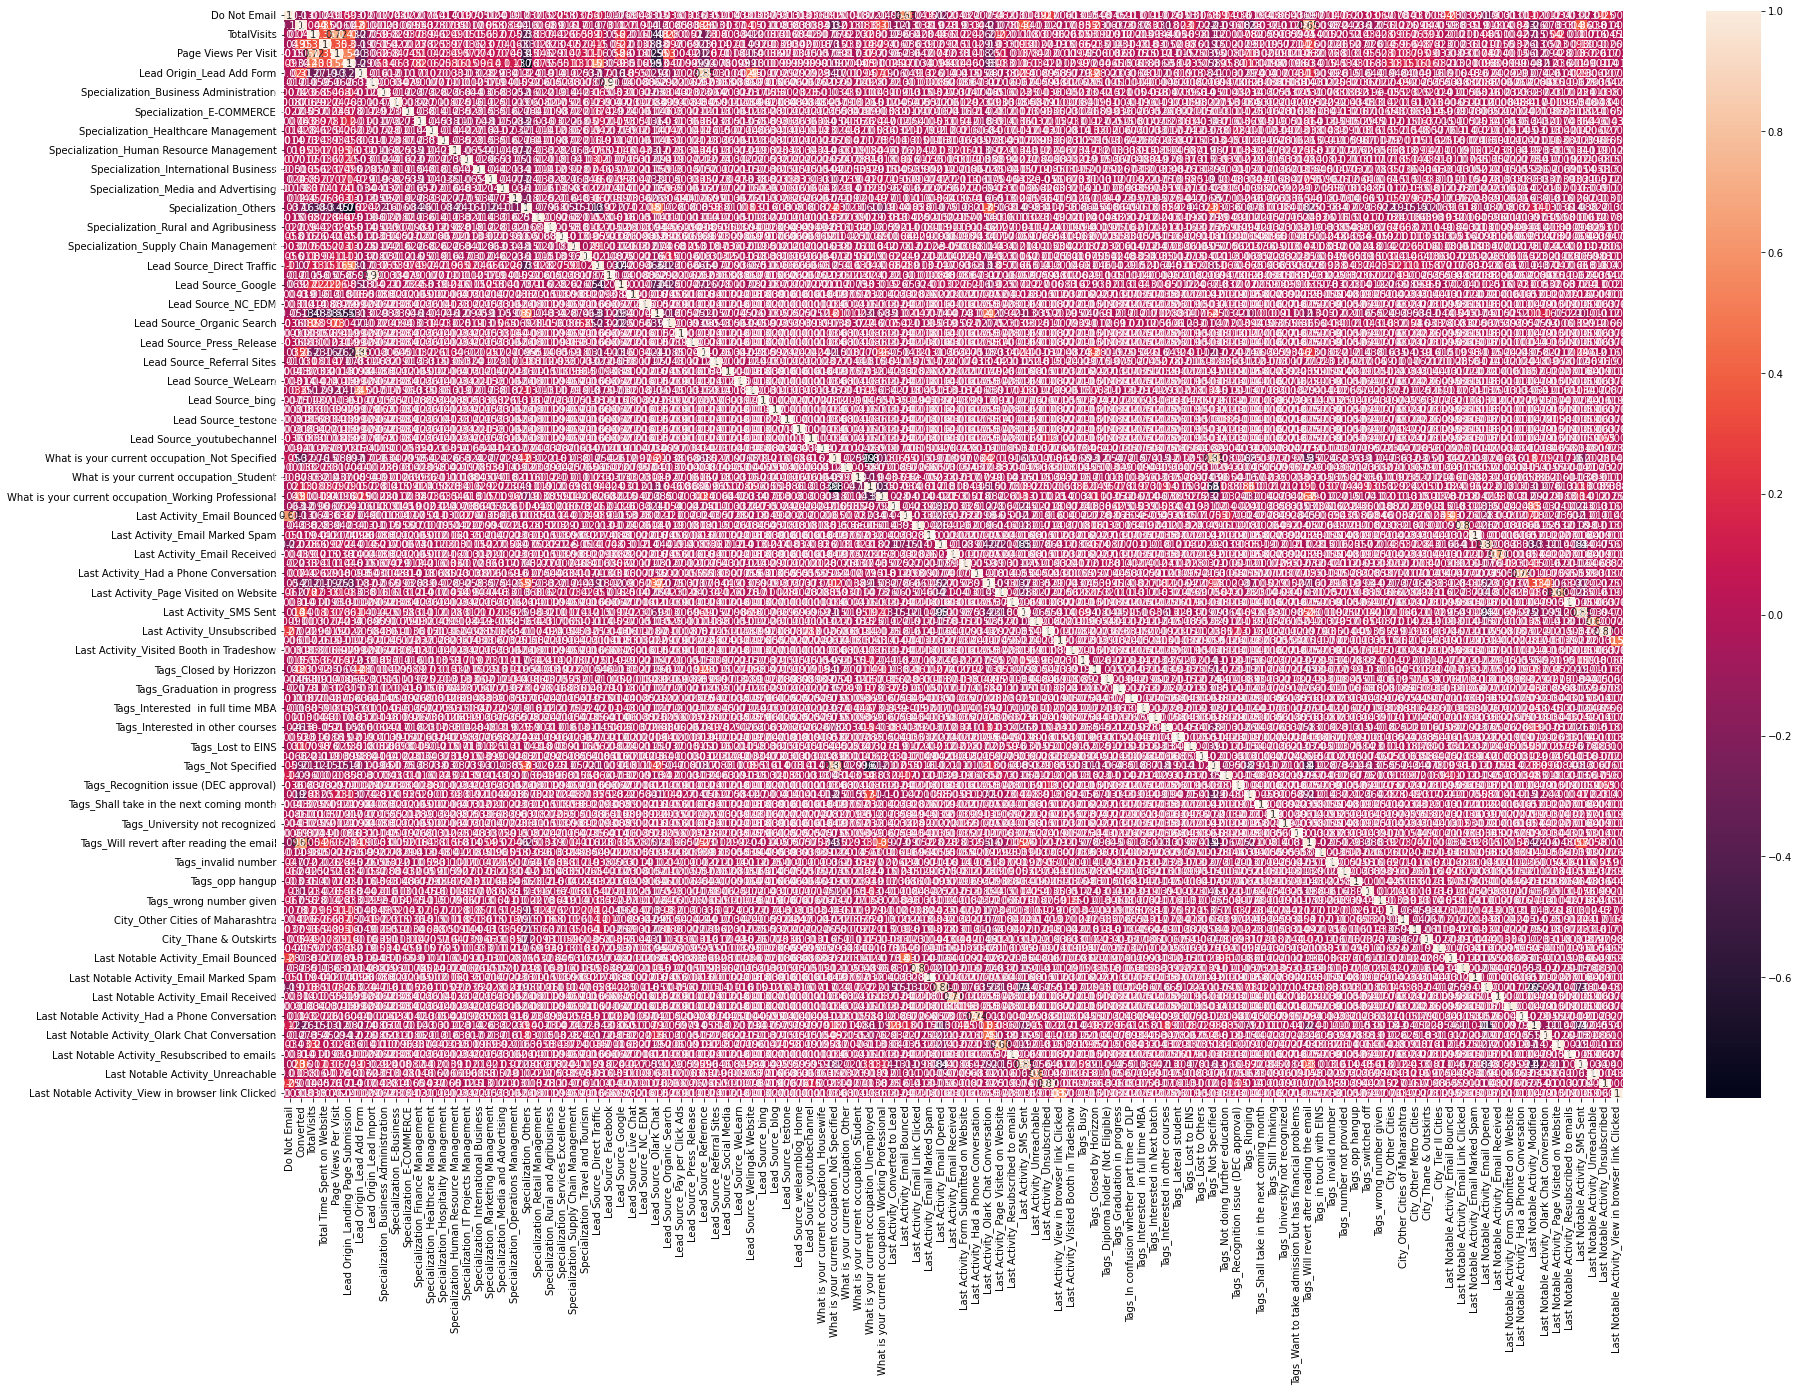

In [81]:
# Let's see the correlation matrix
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df_lead.corr(),annot = True)
plt.show()

### since there are lot of variables it is difficult to drop

# 7. MODEL BUILDING

In [82]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 13),
 ('Page Views Per Visit', False, 50),
 ('Lead Origin_Landing Page Submission', False, 35),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 96),
 ('Specialization_Business Administration', False, 68),
 ('Specialization_E-Business', False, 67),
 ('Specialization_E-COMMERCE', False, 79),
 ('Specialization_Finance Management', False, 45),
 ('Specialization_Healthcare Management', False, 43),
 ('Specialization_Hospitality Management', False, 27),
 ('Specialization_Human Resource Management', False, 65),
 ('Specialization_IT Projects Management', False, 87),
 ('Specialization_International Business', False, 64),
 ('Specialization_Marketing Management', False, 55),
 ('Specialization_Media and Advertising', False, 89),
 ('Specialization_Operations Management', False, 74),
 ('Specialization_Others', False, 44),
 ('Specialization_Retail Management', False, 42),
 ('

In [85]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Not Specified',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Sourc

In [87]:
X_train = X_train[col]

# Model 1

In [88]:
# BUILDING MODEL 1

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.9
Date:                Thu, 23 Feb 2023   Deviance:                       2493.8
Time:                        18:50:38   Pearson chi2:                 1.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6057
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3891      0.183    -18.508      0.000      -3.748      -3.030
Lead Source_Welingak Website                      3.4165      1.027      3.326      0.001       1.403       5.430
What is your current occupation_Not Specified    -2.5077      0.146    -17.215      0.000      -2.793      -2.222
Last Activity_Email Bounced                      -1.7807      0.411     -4.332      0.000      -2.586      -0.975
Last Activity_Olark Chat Conversation            -1.5582      0.232     -6.722      0.000      -2.013      -1.104
Tags_Busy                                         2.4405      0.282      8.655      0.000       1.888       2.993
Tags_Closed by Horizzon                           8.7576      1.021      8.582      0.000       6.757      10.758
Tags_Lateral student                             26.4603   4.31e+04      0.001      1.000   -8.45e+04    8.45e+04
Tags_Lost to EINS                                 8.4579      0.654     12.925      0.000       7.175       9.740
Tags_Not Specified                                3.6073      0.217     16.650      0.000       3.183       4.032
Tags_Ringing                                     -1.6839      0.293     -5.755      0.000      -2.257      -1.110
Tags_Will revert after reading the email          6.3773      0.242     26.330      0.000       5.903       6.852
Tags_invalid number                              -2.3495      1.040     -2.259      0.024      -4.388      -0.311
Tags_switched off                                -2.3392      0.623     -3.754      0.000      -3.560      -1.118
Tags_wrong number given                         -21.7310   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Last Notable Activity_SMS Sent                    2.6273      0.135     19.505      0.000       2.363       2.891
=================================================================================================================
"""

In [89]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Source_Welingak Website  1.13
2                     Last Activity_Email Bounced  1.04
4                                       Tags_Busy  1.03
12                              Tags_switched off  1.03
7                               Tags_Lost to EINS  1.02
5                         Tags_Closed by Horizzon  1.01
11                            Tags_invalid number  1.01
13                        Tags_wrong number given  1.01
6                            Tags_Lateral student  1.00
3           Last Activity_Olark Chat Conversation  0.30
14                 Last Notable Activity_SMS Sent  0.25
1   What is your current occupation_Not Specified  0.21
10       Tags_Will revert after reading the email  0.12
8                              Tags_Not Specified  0.05
9                                    Tags_Ringing  0.04

In [90]:
# dropping column with high p-value

X_train.drop('Tags_Lateral student', axis = 1, inplace = True)

# Model 2

In [91]:
# BUILDING MODEL 2

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.8
Date:                Thu, 23 Feb 2023   Deviance:                       2509.5
Time:                        18:51:49   Pearson chi2:                 1.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.3074      0.176    -18.753      0.000      -3.653      -2.962
Lead Source_Welingak Website                      3.4164      1.027      3.326      0.001       1.403       5.430
What is your current occupation_Not Specified    -2.5088      0.146    -17.217      0.000      -2.794      -2.223
Last Activity_Email Bounced                      -1.7861      0.411     -4.351      0.000      -2.591      -0.982
Last Activity_Olark Chat Conversation            -1.5636      0.232     -6.754      0.000      -2.017      -1.110
Tags_Busy                                         2.3576      0.278      8.489      0.000       1.813       2.902
Tags_Closed by Horizzon                           8.6767      1.019      8.512      0.000       6.679      10.675
Tags_Lost to EINS                                 8.3786      0.653     12.838      0.000       7.099       9.658
Tags_Not Specified                                3.5260      0.211     16.708      0.000       3.112       3.940
Tags_Ringing                                     -1.7682      0.288     -6.129      0.000      -2.334      -1.203
Tags_Will revert after reading the email          6.2961      0.237     26.546      0.000       5.831       6.761
Tags_invalid number                              -2.4339      1.039     -2.343      0.019      -4.470      -0.398
Tags_switched off                                -2.4235      0.621     -3.902      0.000      -3.641      -1.206
Tags_wrong number given                         -21.8145   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Last Notable Activity_SMS Sent                    2.6303      0.134     19.576      0.000       2.367       2.894
=================================================================================================================
"""

In [92]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Source_Welingak Website  1.13
2                     Last Activity_Email Bounced  1.04
4                                       Tags_Busy  1.03
11                              Tags_switched off  1.03
6                               Tags_Lost to EINS  1.02
5                         Tags_Closed by Horizzon  1.01
10                            Tags_invalid number  1.01
12                        Tags_wrong number given  1.01
3           Last Activity_Olark Chat Conversation  0.30
13                 Last Notable Activity_SMS Sent  0.25
1   What is your current occupation_Not Specified  0.21
9        Tags_Will revert after reading the email  0.12
7                              Tags_Not Specified  0.05
8                                    Tags_Ringing  0.04

In [93]:
# dropping column with high p-value

X_train.drop('Tags_wrong number given', axis = 1, inplace = True)

# Model 3

In [96]:
# BUILDING MODEL 3

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.2
Date:                Thu, 23 Feb 2023   Deviance:                       2520.4
Time:                        18:54:31   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6041
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.4349      0.179    -19.233      0.000      -3.785      -3.085
Lead Source_Welingak Website                      3.4152      1.027      3.325      0.001       1.402       5.428
What is your current occupation_Not Specified    -2.4975      0.145    -17.223      0.000      -2.782      -2.213
Last Activity_Email Bounced                      -1.7904      0.411     -4.361      0.000      -2.595      -0.986
Last Activity_Olark Chat Conversation            -1.5655      0.232     -6.757      0.000      -2.020      -1.111
Tags_Busy                                         2.5067      0.276      9.076      0.000       1.965       3.048
Tags_Closed by Horizzon                           8.8047      1.020      8.634      0.000       6.806      10.803
Tags_Lost to EINS                                 8.4983      0.653     13.009      0.000       7.218       9.779
Tags_Not Specified                                3.6599      0.212     17.256      0.000       3.244       4.076
Tags_Ringing                                     -1.5942      0.285     -5.587      0.000      -2.153      -1.035
Tags_Will revert after reading the email          6.4273      0.238     26.952      0.000       5.960       6.895
Tags_invalid number                              -2.2580      1.038     -2.176      0.030      -4.292      -0.224
Tags_switched off                                -2.2480      0.620     -3.628      0.000      -3.462      -1.034
Last Notable Activity_SMS Sent                    2.5760      0.132     19.532      0.000       2.317       2.834
=================================================================================================================
"""

In [97]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Source_Welingak Website  1.13
2                     Last Activity_Email Bounced  1.03
4                                       Tags_Busy  1.03
11                              Tags_switched off  1.03
6                               Tags_Lost to EINS  1.02
5                         Tags_Closed by Horizzon  1.01
10                            Tags_invalid number  1.01
3           Last Activity_Olark Chat Conversation  0.30
12                 Last Notable Activity_SMS Sent  0.25
1   What is your current occupation_Not Specified  0.21
9        Tags_Will revert after reading the email  0.12
7                              Tags_Not Specified  0.05
8                                    Tags_Ringing  0.04

## As all the p-value < 0.05 and vif < 5 so the model seems to be good and we can proceed with this model (Model 3).

# 8. Predicting the model

In [98]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.079216
4696    0.079216
3274    0.575294
2164    0.006690
1667    0.952232
7024    0.556023
8018    0.021082
778     0.093426
6942    0.006690
4440    0.093426
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07921646, 0.07921646, 0.57529398, 0.00669022, 0.95223215,
       0.55602324, 0.02108203, 0.09342599, 0.00669022, 0.09342599])

#### Creating dataframe with conversion rate and probabilities of predicted ones

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

Converted  Conversion_Prob  Prospect ID
0          1         0.079216         9196
1          0         0.079216         4696
2          0         0.575294         3274
3          0         0.006690         2164
4          1         0.952232         1667
5          0         0.556023         7024
6          0         0.021082         8018
7          0         0.093426          778
8          0         0.006690         6942
9          0         0.093426         4440

#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted
0          1         0.079216         9196          0
1          0         0.079216         4696          0
2          0         0.575294         3274          1
3          0         0.006690         2164          0
4          1         0.952232         1667          1

In [102]:
# importing metrics from sklearn 

from sklearn import metrics

In [103]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3633  249]
 [ 211 2174]]


In [104]:
# Predicted     not_converted    converted
# Actual
# not_converted       3633        249
# converted           211         2174

In [105]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9265996489548428

## Metrics beyond simply accuracy

In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity 

TP / float(TP+FN)

0.9115303983228511

In [108]:
# Let us calculate specificity

TN / float(TN+FP)

0.9358578052550232

In [109]:
# Calculate false postive rate - predicting converted when customer does not have converted

print(FP/ float(TN+FP))

0.06414219474497682


In [110]:
# positive predictive value 

print (TP / float(TP+FP))

0.8972348328518366


In [111]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9451092611862643


### With the current cut off as 0.5 we have around 92.65% accuracy, 91.15% sensitivity and 93.58% specificity.

# 9. Plotting the ROC Curve

# An ROC curve demonstrates several things:
*It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
*The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
*The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

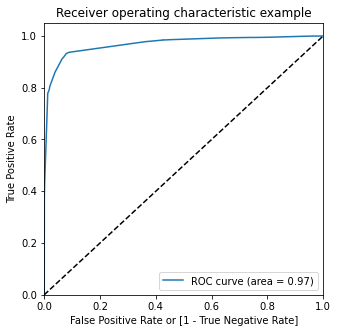

In [114]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under the curve is 0.97.

# 10. Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity¶

In [115]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          1         0.079216         9196          0    1    0    0    0   
1          0         0.079216         4696          0    1    0    0    0   
2          0         0.575294         3274          1    1    1    1    1   
3          0         0.006690         2164          0    1    0    0    0   
4          1         0.952232         1667          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    1    1    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    1    1    1

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.919579  0.937107  0.908810
0.2   0.2  0.921653  0.935849  0.912931
0.3   0.3  0.926600  0.911530  0.935858
0.4   0.4  0.926600  0.911530  0.935858
0.5   0.5  0.926600  0.911530  0.935858
0.6   0.6  0.913515  0.805451  0.979907
0.7   0.7  0.913356  0.805031  0.979907
0.8   0.8  0.912558  0.802096  0.980422
0.9   0.9  0.907292  0.776520  0.987635


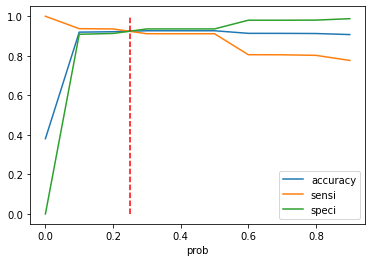

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x= 0.25, ymax = 1.0, ymin=0.0, color='r', linestyle='--')
plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          1         0.079216         9196          0    1    0    0    0   
1          0         0.079216         4696          0    1    0    0    0   
2          0         0.575294         3274          1    1    1    1    1   
3          0         0.006690         2164          0    1    0    0    0   
4          1         0.952232         1667          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    1    1    0    0    0    0                1  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    1                1

In [119]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9251635551300462

In [120]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3633  249]
 [ 211 2174]]


In [121]:
# Predicted     not_converted    converted
# Actual
# not_converted       3633        249
# converted           211         2174

In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Let's see the sensitivity

TP / float(TP+FN)

0.9115303983228511

In [124]:
# Let us calculate specificity

TN / float(TN+FP)

0.9358578052550232

In [125]:
# Calculate false postive rate - predicting converted when customer does not have converted

print(FP/ float(TN+FP))

0.06414219474497682


In [126]:
# positive predictive value 

print (TP / float(TP+FP))

0.8972348328518366


## Precision And Recall

In [127]:
# Let's look at the confusion matrix again

In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3633  249]
 [ 211 2174]]


In [129]:
# Predicted     not_converted    converted
# Actual
# not_converted       3752        130
# converted           286         2099

In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Precision

print(TP/ float(TP+FP))

0.8972348328518366


In [132]:
# Recall

print(TP/ float(TP+FN))

0.9115303983228511


#### Using sklearn utilities for the same

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
# Precision Score

precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8972348328518366

In [135]:
# Recall Score

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9115303983228511

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Converted, Length: 6267, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Predicted, Length: 6267, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

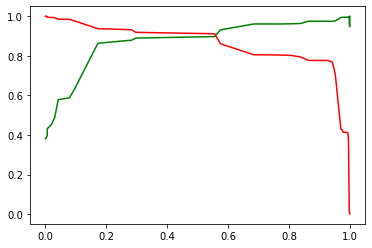

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 11. Prediction on Test set

In [140]:
# Scaling numeric values

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [141]:
# Substituting all the columns in the final train model

col = X_train.columns

In [142]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]

In [143]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  Lead Source_Welingak Website  \
7681    1.0                             0   
984     1.0                             0   
8135    1.0                             0   
6915    1.0                             0   
2712    1.0                             0   
...     ...                           ...   
9029    1.0                             0   
1420    1.0                             0   
5996    1.0                             0   
4143    1.0                             0   
1005    1.0                             0   

      What is your current occupation_Not Specified  \
7681                                              0   
984                                               0   
8135                                              1   
6915                                              0   
2712                                              0   
...                                             ...   
9029                                              1   
1420                                              1   
5996                                              0   
4143                                              0   
1005                                              0   

      Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  \
7681                            0                                      0   
984                             0                                      0   
8135                            0                                      0   
6915                            0                                      0   
2712                            0                                      0   
...                           ...                                    ...   
9029                            0                                      1   
1420                            0                                      1   
5996                            0                                      0   
4143                            0                                      0   
1005                            0                                      0   

      Tags_Busy  Tags_Closed by Horizzon  Tags_Lost to EINS  \
7681          0                        0                  0   
984           0                        0                  0   
8135          0                        0                  0   
6915          0                        0                  0   
2712          0                        0                  0   
...         ...                      ...                ...   
9029          0                        0                  0   
1420          0                        0                  0   
5996          0                        1                  0   
4143          0                        0                  0   
1005          0                        0                  0   

      Tags_Not Specified  Tags_Ringing  \
7681                   0             1   
984                    0             0   
8135                   1             0   
6915                   0             1   
2712                   0             0   
...                  ...           ...   
9029                   1             0   
1420                   1             0   
5996                   0             0   
4143                   0             0   
1005                   1             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
7681                                         0                    0   
984                                          0                    0   
8135                                         0                    0   
6915                                         0                    0   
2712                                         1                    0   
...                                        ...                  ...   
9029                                         0                    0   
1420                                         0               

In [144]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [145]:
y_test_pred[:10]

7681    0.079216
984     0.031223
8135    0.575294
6915    0.006503
2712    0.952232
244     0.006503
4698    0.031223
8287    0.021082
6791    0.952232
8970    0.031223
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [147]:
# Let's see the head

y_pred_1.head()

0
7681  0.079216
984   0.031223
8135  0.575294
6915  0.006503
2712  0.952232

In [148]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [149]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [150]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         7681  0.079216
1          0          984  0.031223
2          0         8135  0.575294
3          0         6915  0.006503
4          1         2712  0.952232

In [153]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [154]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          0         7681        0.079216
1          0          984        0.031223
2          0         8135        0.575294
3          0         6915        0.006503
4          1         2712        0.952232

## Assigning Lead Score

In [155]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [156]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         7681          0        0.079216           8
1          984          0        0.031223           3
2         8135          0        0.575294          58
3         6915          0        0.006503           1
4         2712          1        0.952232          95

In [157]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [158]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         7681          0        0.079216           8                0
1          984          0        0.031223           3                0
2         8135          0        0.575294          58                1
3         6915          0        0.006503           1                0
4         2712          1        0.952232          95                1

In [159]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    950
0     60
Name: final_Predicted, dtype: int64

In [160]:
# check the precentage of final_predicted conversions on test data

945/float(945+65)

0.9356435643564357

In [161]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9307520476545048

In [162]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1550,  126],
       [  60,  950]], dtype=int64)

In [163]:
# Predicted     not_converted    converted
# Actual
# not_converted       1550         126
# converted           60           950

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity

TP / float(TP+FN)

0.9405940594059405

In [166]:
# Let us calculate specificity

TN / float(TN+FP)

0.9248210023866349

In [167]:
# Calculate false postive rate - predicting converted when customer does not have converted

print(FP/ float(TN+FP))

0.07517899761336516


In [168]:
# positive predictive value 

print (TP / float(TP+FP))

0.8828996282527881


# Inference:

# Train data:
    Accuracy: 92.51 %
    Senstivity: 91.15 %
    Specificity: 93.58 %
        
## Test data:
    Accuracy: 93.07 %
    Senstivity: 94.05 %
    Specificity: 92.48 %

## Finding out the leads which shold be contracted (Lead_Score >= 80)

In [169]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
4          2712          1        0.952232          95                1
8          6791          1        0.952232          95                1
12         1026          1        0.952232          95                1
13         5167          1        0.996198         100                1
15         5391          1        0.952232          95                1

In [170]:
# id of leads to be contracted

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

array([2712, 6791, 1026, 5167, 5391, 8650, 4683, 1594, 7068, 1927, 1509,
       5036, 3268, 1311, 5051, 5340, 2500, 8622, 7840, 2709, 7051, 5011,
       2521, 9020, 3511, 4769, 5649, 6984, 1003, 8977, 3249, 4890, 2853,
       2159, 1188, 2617, 5769, 7888, 7268,   75, 2623, 8409,  216, 5373,
       2562, 8625, 4674, 2392, 7989, 7438,  943,  777, 6197,  568, 4612,
       7536,  973, 1932, 4331, 3616, 7707, 8228, 2657, 3412, 3586, 1950,
       7523, 1643, 7686, 4259, 6456, 2570,   82,  460, 7329, 5747, 1332,
       5000, 4646, 2703, 3953, 4634, 3095, 5827, 7470, 6230, 4682, 5061,
       3307, 3465, 8588,  187, 8749, 9037, 4793, 7895, 4803, 7126, 5753,
       6843, 3781, 5474, 6816, 5662, 5752, 5096, 1805, 1549, 3123, 2042,
       1404, 6711, 1573, 3120, 2118, 1056,   22, 4977, 8243, 9197, 1586,
       2243, 8980, 4132, 2984, 4782, 4788, 5071, 1157, 5506, 4320, 4061,
       5194, 4398, 6698, 1809, 4739, 2014, 3839,  764, 8966, 6294, 5035,
        225, 5205,  807, 7570, 7150, 5206, 2444, 83

In [171]:
res.params.sort_values(ascending=False)
    

Tags_Closed by Horizzon                          8.804693
Tags_Lost to EINS                                8.498342
Tags_Will revert after reading the email         6.427328
Tags_Not Specified                               3.659910
Lead Source_Welingak Website                     3.415193
Last Notable Activity_SMS Sent                   2.575987
Tags_Busy                                        2.506735
Last Activity_Olark Chat Conversation           -1.565524
Tags_Ringing                                    -1.594155
Last Activity_Email Bounced                     -1.790447
Tags_switched off                               -2.248000
Tags_invalid number                             -2.258042
What is your current occupation_Not Specified   -2.497541
const                                           -3.434872
dtype: float64

## Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    Tags_Closed by Horizzon                          
    Tags_Lost to EINS                               
    Tags_Will revert after reading the email         
    Tags_Not Specified                               
    Lead Source_Welingak Website                    
    Last Notable Activity_SMS Sent                 
    Tags_Busy     
## Features which should not be considered:
    Last Activity_Olark Chat Conversation           
    Tags_Ringing                                    
    Last Activity_Email Bounced                     
    Tags_switched off                              
    Tags_invalid number                             
    What is your current occupation_Not Specified



